In [68]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import seaborn as sns
from config import consumer_key, consumer_secret, access_token, access_token_secret
import matplotlib.pyplot as plt


# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [69]:
# Target User
target_users = ("BBC", "CBS", "CNN", "FOX", "NYTIMES")

# Tweet Texts
tweet_texts = []
tweet_date = []

#variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
counter_list = []
target_list = []


for target in target_users:
    #Counter
    counter = 1
    # Create a loop to iteratively run API requests
    for x in range(1, 6):

        # Get all tweets from home feed (for each page specified)
        public_tweets = api.user_timeline(target, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Print Tweet
            #print(tweet["text"])

            # Store Tweet in Array
            tweet_texts.append(tweet["text"])

            # Store Tweet Date in Array
            tweet_date.append(tweet["created_at"])

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            counter_list.append(counter)
            target_list.append(target)
            # Store the data in dictionary
            sentiment = {
                "User": target_list,
                "Tweet": tweet_texts,
                "Date": tweet_date,
                "Compound": compound_list,
                "Positive": positive_list,
                "Neutral": negative_list,
                "Negative": neutral_list,
                "Tweets Ago": counter_list
            }
            #add to counter
            #print(target)
            counter += 1
        


In [70]:
#df = pd.DataFrame(sentiment)
sentiment_df = pd.DataFrame(sentiment)

In [71]:
sentiment_df.head(110)

,Compound,Date,Negative,Neutral,Positive,Tweet,Tweets Ago,User
0,-0.4927,Tue Apr 10 18:42:00 +0000 2018,0.842,0.158,0.000,It wasn't until Henry VIII's reign that the #T...,1,BBC
1,-0.5106,Tue Apr 10 18:00:27 +0000 2018,0.784,0.216,0.000,Meet Rebekah - a former professional footballe...,2,BBC
2,0.0000,Tue Apr 10 16:58:05 +0000 2018,1.000,0.000,0.000,🌶🤯 A man who ate the world's hottest chilli pe...,3,BBC
3,0.0000,Tue Apr 10 16:34:54 +0000 2018,1.000,0.000,0.000,"RT @bbccomedy: Henry of Eight, the Tudor Kim K...",4,BBC
4,0.0000,Tue Apr 10 16:32:08 +0000 2018,1.000,0.000,0.000,👭 Ten celebrity pairs who look so freakily ali...,5,BBC
5,0.4227,Tue Apr 10 16:02:03 +0000 2018,0.514,0.150,0.336,😱 That's quite the party trick! \n#Doodlebugs ...,6,BBC
6,0.6705,Tue Apr 10 15:47:43 +0000 2018,0.726,0.066,0.208,"RT @TWBBC: ""Our liberty is at risk when we han...",7,BBC
7,0.7351,Tue Apr 10 15:28:35 +0000 2018,0.763,0.000,0.237,RT @BBCNWT: Have you ever spotted a @RealMancs...,8,BBC
8,0.8126,Tue Apr 10 15:25:18 +0000 2018,0.732,0.000,0.268,RT @BBCR1: Do YOU look like this lady with a t...,9,BBC
9,0.4939,Tue Apr 10 15:18:36 +0000 2018,0.789,0.000,0.211,RT @BBCTwo: Two tiger brothers enjoy their fir...,10,BBC


In [72]:

bbc_sentiment_df = sentiment_df.loc[sentiment_df['User'] == 'BBC']
cbs_sentiment_df = sentiment_df.loc[sentiment_df['User'] == 'CBS']
cnn_sentiment_df = sentiment_df.loc[sentiment_df['User'] == 'CNN']
fox_sentiment_df = sentiment_df.loc[sentiment_df['User'] == 'FOX']
nytimes_sentiment_df = sentiment_df.loc[sentiment_df['User'] == 'NYTIMES']

In [73]:
bbc_sentiment_df.count()

Compound      100
Date          100
Negative      100
Neutral       100
Positive      100
Tweet         100
Tweets Ago    100
User          100
dtype: int64

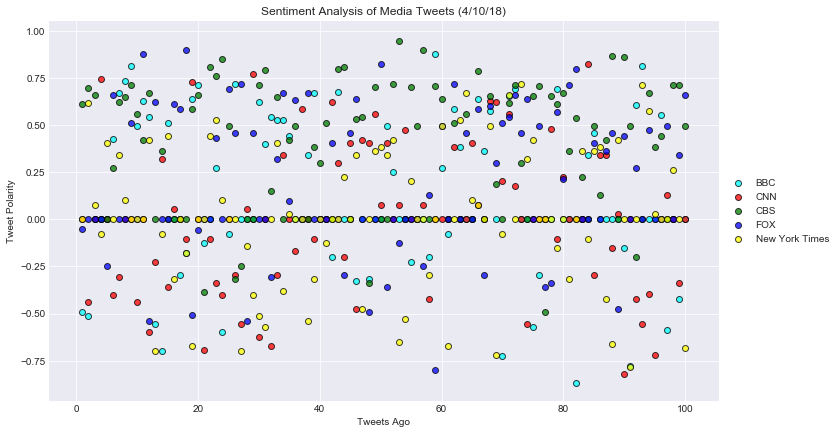

In [102]:
#Plot for Sentiment Analysis
#set seadboard style & size of plot
sns.set_style("darkgrid")
plt.figure(figsize=(12, 7))

#--------plot BBC ------------#
urban_plot = plt.scatter(bbc_sentiment_df['Tweets Ago'], bbc_sentiment_df['Compound'],  facecolors="cyan", edgecolors="black",
            alpha=0.75)

#--------plot CNN ------------#
urban_plot = plt.scatter(cnn_sentiment_df['Tweets Ago'], cnn_sentiment_df['Compound'],  facecolors="red", edgecolors="black",
            alpha=0.75)

#--------plot CBS ------------#
urban_plot = plt.scatter(cbs_sentiment_df['Tweets Ago'], cbs_sentiment_df['Compound'],  facecolors="green", edgecolors="black",
            alpha=0.75)

#--------plot FOX ------------#
urban_plot = plt.scatter(fox_sentiment_df['Tweets Ago'], fox_sentiment_df['Compound'],  facecolors="blue", edgecolors="black",
            alpha=0.75)

#--------plot NYTIMES ------------#
urban_plot = plt.scatter(nytimes_sentiment_df['Tweets Ago'], nytimes_sentiment_df['Compound'],  facecolors="yellow", edgecolors="black",
            alpha=0.75)

#Titles and axis'
plt.title("Sentiment Analysis of Media Tweets (4/10/18)")
plt.xlabel("Tweets Ago")
labels = ['BBC','CNN', 'CBS', 'FOX', 'New York Times']
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xlim([-180,180])
plt.ylabel("Tweet Polarity")
plt.savefig("Sentiment_Scatter_Plot_4-10-18.png")

plt.show()


In [99]:
#Average the compound vader analysis for each broadcasting company
bbc_compound_avg = (f"{np.mean(bbc_sentiment_df['Compound']):.3f}")
cbs_compound_avg = (f"{np.mean(cbs_sentiment_df['Compound']):.3f}")
cnn_compound_avg = (f"{np.mean(cnn_sentiment_df['Compound']):.3f}")
fox_compound_avg = (f"{np.mean(fox_sentiment_df['Compound']):.3f}")
nytimes_compound_avg = (f"{np.mean(nytimes_sentiment_df['Compound']):.3f}")

#create DF with all compounded averages
compound_df = [bbc_compound_avg, cbs_compound_avg, cnn_compound_avg, fox_compound_avg, nytimes_compound_avg]


['0.118', '0.367', '0.002', '0.189', '0.015']


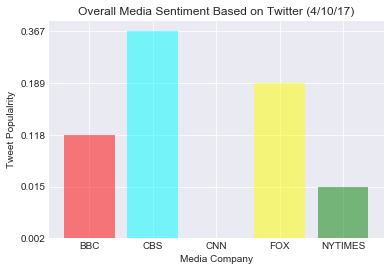

In [100]:
# Create a plot  
x_axis = np.arange(len(compund_df))

plt.bar(x_axis, compound_df, color=('red', 'cyan', 'blue', 'yellow', 'green'), alpha=0.5, align="edge")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, target_users)

# Give our chart some labels and a tile
plt.title("Overall Media Sentiment Based on Twitter (4/10/17)")
plt.xlabel("Media Company")
plt.ylabel("Tweet Populalrity")

# Sets the y limits of the current chart
#plt.ylim([-0.20,1])
# Print our chart to the screen
plt.show()
plt.savefig("Avg_Media Sentiment_Bar_Plot_4-10-18.png")
#Sentiment values left to right
#['0.118', '0.367', '0.002', '0.189', '0.015']